In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [105]:
# import the dataset
df = pd.read_csv('50_Startups.csv')

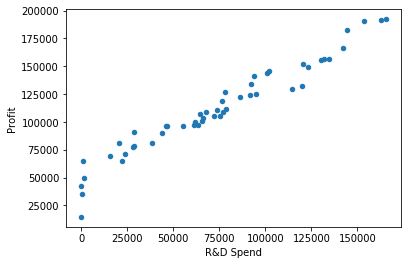

Correlation coef and p-value: (0.9729004656594831, 3.5003222436905997e-32)


In [4]:
# Analysing the relation Research and development x rofit
df.plot(kind='scatter', x='R&D Spend', y='Profit')
plt.show()

print('Correlation coef and p-value:', pearsonr(df['R&D Spend'], df['Profit']))

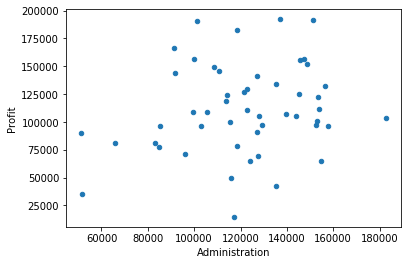

Correlation coef and p-value: (0.20071656826872133, 0.16221739470358268)


In [5]:
# Analysing the relation Research and development x Profit
df.plot(kind='scatter', x='Administration', y='Profit')
plt.show()

print('Correlation coef and p-value:', pearsonr(df['Administration'], df['Profit']))

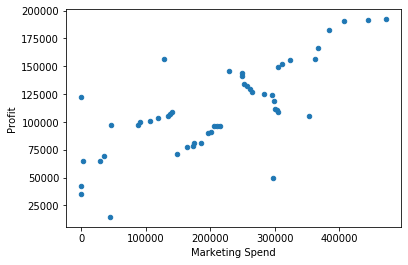

Correlation coef and p-value: (0.7477657217414766, 4.381073182030977e-10)


In [6]:
# Analysing the relation Marketing Spend x Profit
df.plot(kind='scatter', x='Marketing Spend', y='Profit')
plt.show()

print('Correlation coef and p-value:', pearsonr(df['Marketing Spend'], df['Profit']))

### Visual analysis sumary

- Research and development appears highly correlated with profit
- Marketing Spend appears correlated with profit
- Administration does not appear correlated with profit. (So we would not use that variable in the linear regression, since it does not contribute to the prediction, but lets keep it by now...)


### Let's continue the analysis with the relation between the independent variables themselves...

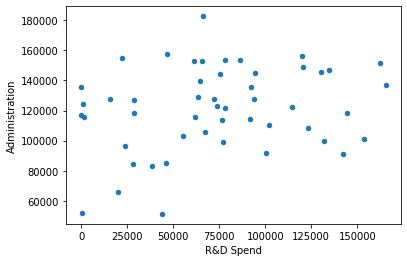

Correlation coef and p-value: (0.2419552450816892, 0.09048123409316794)


In [7]:
# Checking the relation: Research and development X Administration
df.plot(kind='scatter', x='R&D Spend', y='Administration')
plt.show()

print('Correlation coef and p-value:', pearsonr(df['R&D Spend'], df['Administration']))


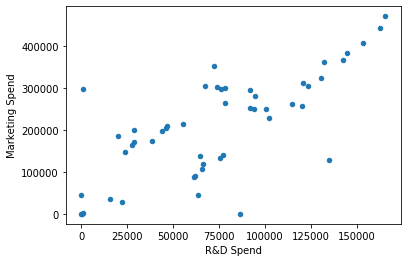

Correlation coef and p-value: (0.7242481330538793, 2.769807641290393e-09)


In [8]:
# Checking the relation: Research and development X Marketing Spend
df.plot(kind='scatter', x='R&D Spend', y='Marketing Spend')
plt.show()

print('Correlation coef and p-value:', pearsonr(df['R&D Spend'], df['Marketing Spend']))

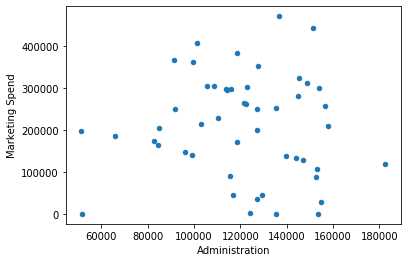

Correlation coef and p-value: (-0.032153875125386575, 0.8245716885170772)


In [9]:
# Checking the relation: Administration X Marketing Spend
df.plot(kind='scatter', x='Administration', y='Marketing Spend')
plt.show()

print('Correlation coef and p-value:', pearsonr(df['Administration'], df['Marketing Spend']))

### Visual analysis sumary

- The graph "Research and development X Marketing Spend" reveals that we have a potential problem. Two independent variables have a 0.7 correlation, and a low p-value (< 0.05), so there is a significant relationship between them. (as research spending increases, so does marketing spending). If we include the two variables in the regression, the coeficients assigned to each variable may not reflect the true effect of each one, since they are redundat.
- The graph "Research and development X Administration" has a non significant correlation, p-value > 0.05.
- The graph "Administration X Marketing Spend" also has a non significant correlation.

In [10]:
df.corr() 

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


So lets get started preprocessing the dataset...

In [106]:
# encoding the categorical variable
dummies = pd.get_dummies(df.State)
merged = pd.concat([dummies, df], axis='columns')
# avoid dummy variable trap
df = merged.drop(['State', 'California'], axis='columns')

In [107]:
# splitting the independent, and dependent variables
X= df.iloc[:,:-1].values
y= df.iloc[:,-1].values

In [57]:
# Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Fitting multiple linear regression to the training set...

In [58]:
# Fitting multiple linear regression to the training set...
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
# Predicting the test set results
y_pred = regressor.predict(X_test)

## Building a optimal model...

In [108]:
import statsmodels.api as sm

# setting x0 to 1 to fit to the statsmodels library
X = np.append(arr= np.ones((50, 1), dtype=int), values = X, axis=1)

Creating a new matrix that will be optmized...

In [109]:
# selecting all columns to create a new regressor with the statsmodel library 
X_opt = X[:, [0,1,2,3,4,5]]
regressorOLS = sm.OLS(endog = y, exog = X_opt).fit()

In [110]:
# exploring the statistic metrics
regressorOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Tue, 07 Jan 2020   Prob (F-statistic):           1.34e-27
Time:                        01:38:28   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Looking for the highest p-value...  
#### X2( wich correspond to the state Florida)

### Removing X2 and fitting the model again...


In [111]:
# selecting the best columns
X_opt = X[:, [0,1,3,4,5]]
regressorOLS = sm.OLS(endog = y, exog = X_opt).fit()
regressorOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Tue, 07 Jan 2020   Prob (F-statistic):           8.49e-29
Time:                        01:44:46   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Looking for the highest p-value...  
#### X1( wich correspond to the state New York)

### Removing X1 and fitting the model again...

In [113]:
# selecting the best columns
X_opt = X[:, [0,3,4,5]]
regressorOLS = sm.OLS(endog = y, exog = X_opt).fit()
regressorOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 07 Jan 2020   Prob (F-statistic):           4.53e-30
Time:                        01:48:35   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Looking for the highest p-value...  
#### X2( wich correspond to the variable Administration)

### Removing X2 and fitting the model again...

In [115]:
# selecting the best columns
X_opt = X[:, [0,3,5]]
regressorOLS = sm.OLS(endog = y, exog = X_opt).fit()
regressorOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Tue, 07 Jan 2020   Prob (F-statistic):           2.16e-31
Time:                        01:51:06   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Looking for the highest p-value...  
#### X2 has p-value 0.06 that is very close to the significance level of 0.05, but we can see that: 
#### **The condition number is large, 5.32e+05. This might indicate that there are strong multicollinearity or other numerical problems.

### So we will remove X2(Market Spend) and fit the model again...

In [117]:
# selecting the best columns
X_opt = X[:, [0,3]]
regressorOLS = sm.OLS(endog = y, exog = X_opt).fit()
regressorOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Tue, 07 Jan 2020   Prob (F-statistic):           3.50e-32
Time:                        02:08:52   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can see that the condition number has decreased, althought is still high. 
# We can conclude that the best model to predict the profit should include only the research and development variable.